# Exploratory data analysis on a Diabetes-related hospital readmission 

## Knowing the dataset and formulating the scientific  problem
As it is an exercise, the packages will no be imported all at once in the first cell as usual, but they will be imported according to the observed needings, and their use will be explained when necessary.

In [1]:
import pandas as pd

In [2]:
raw_data = pd.read_csv('./dataset_diabetes/diabetic_data.csv')

print(raw_data.shape)
print(raw_data.keys())
raw_data.head()


(101766, 50)
Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


Since better input data will result in a better overall performance of any model, the first step that will be developed is an overall study of the dataset.  From the information  on the main source in Strack et. al. 2014 (https://www.hindawi.com/journals/bmri/2014/781670/), and Table 1 of the supplementary material (https://www.hindawi.com/journals/bmri/2014/781670/tab1/),  we have the following preliminary insights:

- The extraction of this dataset from a bigger one was done by clinical experts who consider that all the 50 features of this specific dataset could be important to evaluate the effectiveness of the medical treatment of patients with diabetes

- In some cases, there are several entries registered for the same patient to the hospital. In the study performed in the source article, multiple entries for the same patient (identified by the "patient_nbr" column) were considered as not independent, and for the sake of using a Multivariate Logistic Regression model, such repetitive entries were removed to leave only one entry for each patient. In that manuscript the discharge motive ("discharge_disposition_id", e.j. patients who died or were sent to a hospice were not considered) was also taken into account to reduce the original dataset from 101766 data rows to around 70000

- In the source article, the features age, gender, race, admission source, discharge disposition, primary diagnosis, the specialty of physician, time in hospital, and result of the HbA1c test were correlated among them and examined to determine the importance of measuring the HbA1c value to reduce hospital readmissions in less than 30 days. The results showed that primary diagnosis is a crucial factor to determine the probability of readmission in less than 30 days, which is also related to the frequency with which HbA1c tests were taken, independently of their result.

- 97 % of the data of feature "weight" is missing, as well as 52 % and 53 % of the "payer_code" and "medical_specialty", respectively

With basis on these insights, and taking into account that there is a previous report where the study of the influence of the measurement of the HbAc1 parameter on early readmissions ("readmission" == '<30') was favored,  the formulation of the scientific problem that is intended to solve here is **to perform a generalization of the conclusions in that study by taking all variables (features) into account in our first approach and evaluating which, if some of them do, represent a cause for early readmission, middle time readmission ("readmission" == '<30'), or a thus considered completely effective treatment with no further readmissions ("readmission" == 'NO')**.
With this, the first treatment that will be performed on the dataset is described below.

- The features "encounter_id" and "patient_nbr" will be removed for not considering them relevant for a classification problem. In this case, considering that there is already an indicator of the frequency of readmission in each row, there are indicators of health conditions in the year previous to each admission, and the fact that we do not know how all of those evolved with time during the period of the ten years the dataset was taken, we will consider all admissions as independent entries.

- Although the "payer_code" feature could be useful for further statistics, it is not considered as relevant for the specific problem, and as it has more than 50 % missing data, this will also be dropped.

- The medical specialty did not show to be important for hospital readmission in the previous study of this data set, and it has more than 50 % of missing data; thus this feature will also be disregarded.

- In the case of the feature "weight", it will be dismissed because of the huge amount of missing data.


* **Note:** We are defining this problem by thinking about the aim of this exercise and the short time available to complete it. This means the additional literature where this dataset is studied has not been taken into account This is important because there are more than 100 publications that cite the source manuscript, more than 50 % of them in the Information and Computing Sciences area. There, it is probable that this problem has been solved already. 

In [3]:
## First, some of the given information about the dataset will be confirmed:

print(raw_data['weight'].value_counts())
print(raw_data['patient_nbr'].value_counts())

?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64
88785891     40
43140906     28
23199021     23
1660293      23
88227540     23
             ..
71081460      1
30060018      1
67443444      1
141344240     1
93251151      1
Name: patient_nbr, Length: 71518, dtype: int64


It can be seen in the output of the cell above that 98569 data in the weight variable correspond to a symbol "?". This value represents indeed approximately 97 % of the 101766 total data.
It can also be seen that the same patient id appears more than once on several occasions.

In [4]:
## Remotion of selected columns:

raw_data.drop(['weight', 'encounter_id', 'patient_nbr', 'payer_code', 'medical_specialty'], inplace=True, axis=1)
raw_data

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),1,3,7,3,51,0,16,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,AfricanAmerican,Female,[80-90),1,4,5,5,33,3,18,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,Caucasian,Male,[70-80),1,1,7,1,53,0,9,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,Caucasian,Female,[80-90),2,3,7,10,45,2,21,...,No,Up,No,No,No,No,No,Ch,Yes,NO


## Cleaning data

As the features of the dataset were previously selected by experts of the medical area, we will assume that all the remaining features may have some importance for a classification model concerning the effectiveness of overall medical treatment of diabetes in reducing early readmissions, thus, all of them will be processed in order to leave them usable by most of the classification models. The first step will be looking for missing values.

From the information available from the source,  it is expected that columns containing the race and primary diagnosis ("race" and "diag_3") have 2 % and 1 % of missing values, respectively. Considering that the complete dataset is large enough, the rows containing missing values in those parameters will also be dropped since that will eliminate only around 3% of the data.

In the output of the cell below it can be seen that the missing values in this dataset are represented by the symbol "?".

In [5]:
#raw_data.keys()
print(raw_data['race'].unique())
print(raw_data['diag_3'].unique())

['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
['?' '255' 'V27' '403' '250' 'V45' '38' '486' '996' '197' '250.6' '427'
 '627' '414' '416' '714' '428' '582' 'V43' '250.01' '263' '250.42' '276'
 '482' '401' '250.41' '585' '781' '278' '998' '568' '682' '618' '250.02'
 '305' '707' '496' '599' '715' '424' '518' '553' '794' '411' 'V42' '531'
 '511' '490' '562' '250.8' '250.7' '250.52' '784' '491' '581' '420' '8'
 '724' '730' '789' '131' '250.82' '999' '41' '493' '250.03' '753' '786'
 '529' 'E888' '425' '595' '303' '560' '711' '492' '332' '296' '438' '362'
 '250.4' '654' '244' 'V70' '737' '625' '681' '250.51' '404' 'V10' '810'
 '280' '440' '785' '588' '569' '272' '997' '250.43' '918' '584' '54' '788'
 '426' '722' '250.92' '196' '461' '535' '787' '891' '284' '458' '648'
 '780' '182' '285' '593' '413' '664' '564' '201' '356' 'V15' '292' '782'
 '473' '455' 'E932' '357' '348' '294' '250.23' '459' 'E878' '437' '733'
 '507' '525' '250.53' '397' '572' '805' '453' '331' '736' '402' '5

In [6]:
## Filtering rows with "?" in columns "race" and "diag_3":

new_frame1 = raw_data[raw_data['race'] != '?']
new_frame2 = new_frame1[new_frame1['diag_3'] != '?']
new_frame2.reset_index(drop=True, inplace = True)

print(new_frame2.shape)
#print(new_frame2.keys())

(98144, 45)


From the output of the cell above it is found that 3622 rows were removed. That value corresponds to 3.6 % of the original dataset, o.6% more than expected. This puts in evidence that, as the information ontained from the description of the data set in https://www.hindawi.com/journals/bmri/2014/781670/tab1/ only takes into account one significant digit to describe the percentage of missing values, this leaves untracked the missing values if they are present in a quantity less than 1 %, and so, it is possible that there are some missing values in other columns.

First, the columns with the second and third diagnoses will be stripped of possible missing values.

In [7]:
new_frame3 = new_frame2[new_frame2['diag_1'] != '?']
new_frame4 = new_frame3[new_frame3['diag_2'] != '?']
new_frame4.reset_index(drop=True, inplace = True)

new_frame4

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,No,Up,No,No,No,No,No,Ch,Yes,>30
1,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,...,No,No,No,No,No,No,No,No,Yes,NO
2,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,No,Up,No,No,No,No,No,Ch,Yes,NO
3,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[50-60),2,1,2,3,31,6,16,...,No,Steady,No,No,No,No,No,No,Yes,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98048,AfricanAmerican,Male,[70-80),1,3,7,3,51,0,16,...,No,Down,No,No,No,No,No,Ch,Yes,>30
98049,AfricanAmerican,Female,[80-90),1,4,5,5,33,3,18,...,No,Steady,No,No,No,No,No,No,Yes,NO
98050,Caucasian,Male,[70-80),1,1,7,1,53,0,9,...,No,Down,No,No,No,No,No,Ch,Yes,NO
98051,Caucasian,Female,[80-90),2,3,7,10,45,2,21,...,No,Up,No,No,No,No,No,Ch,Yes,NO


The output of the cell above shows that the total number of rows was reduced from 98144 to 98053. This indicates that in fact there were 91 rows with missing data which were not reported in the original source because they represent less than 1 % of the original dataset.

To evaluate if there are missing values in other columns, the description of the quantity and type of data that, according to the source manuscript, should be present in each column will be used again (see specifically https://www.hindawi.com/journals/bmri/2014/781670/tab1/). 

In [8]:
print(new_frame4.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98053 entries, 0 to 98052
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      98053 non-null  object
 1   gender                    98053 non-null  object
 2   age                       98053 non-null  object
 3   admission_type_id         98053 non-null  int64 
 4   discharge_disposition_id  98053 non-null  int64 
 5   admission_source_id       98053 non-null  int64 
 6   time_in_hospital          98053 non-null  int64 
 7   num_lab_procedures        98053 non-null  int64 
 8   num_procedures            98053 non-null  int64 
 9   num_medications           98053 non-null  int64 
 10  number_outpatient         98053 non-null  int64 
 11  number_emergency          98053 non-null  int64 
 12  number_inpatient          98053 non-null  int64 
 13  diag_1                    98053 non-null  object
 14  diag_2                

From the previous output, it can be verified that the columns are well classified according to the data type they should contain, and the numerical ones do not contain missing values. Now to check that among the columns containing categorical (object) data, there are no further missing values, it will be checked if the number of "categories" is the right one (for example that the target column has only 3 different values).

In [9]:
categorical_data = new_frame4.select_dtypes(include=['object'])
#categorical_data.head()

for column in categorical_data.keys():
    print(column, categorical_data[column].value_counts().count())

categorical_data

race 5
gender 3
age 10
diag_1 713
diag_2 740
diag_3 786
max_glu_serum 4
A1Cresult 4
metformin 4
repaglinide 4
nateglinide 4
chlorpropamide 4
glimepiride 4
acetohexamide 2
glipizide 4
glyburide 4
tolbutamide 2
pioglitazone 4
rosiglitazone 4
acarbose 4
miglitol 4
troglitazone 2
tolazamide 3
examide 1
citoglipton 1
insulin 4
glyburide-metformin 4
glipizide-metformin 2
glimepiride-pioglitazone 2
metformin-rosiglitazone 1
metformin-pioglitazone 2
change 2
diabetesMed 2
readmitted 3


,race,gender,age,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,metformin,repaglinide,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[10-20),276,250.01,255,None,None,No,No,...,No,Up,No,No,No,No,No,Ch,Yes,>30
1,AfricanAmerican,Female,[20-30),648,250,V27,None,None,No,No,...,No,No,No,No,No,No,No,No,Yes,NO
2,Caucasian,Male,[30-40),8,250.43,403,None,None,No,No,...,No,Up,No,No,No,No,No,Ch,Yes,NO
3,Caucasian,Male,[40-50),197,157,250,None,None,No,No,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[50-60),414,411,250,None,None,No,No,...,No,Steady,No,No,No,No,No,No,Yes,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98048,AfricanAmerican,Male,[70-80),250.13,291,458,None,>8,Steady,No,...,No,Down,No,No,No,No,No,Ch,Yes,>30
98049,AfricanAmerican,Female,[80-90),560,276,787,None,None,No,No,...,No,Steady,No,No,No,No,No,No,Yes,NO
98050,Caucasian,Male,[70-80),38,590,296,None,None,Steady,No,...,No,Down,No,No,No,No,No,Ch,Yes,NO
98051,Caucasian,Female,[80-90),996,285,998,None,None,No,No,...,No,Up,No,No,No,No,No,Ch,Yes,NO


By comparing the output of the cell above with the source information, it was verified that the right number of categories is present in all columns and so, that there are no missing values in any of them, except for "diag_1", "diag_2", and "diag_3"; in those cases,  the number of categories is lower than the one mentioned in the source (i.e. 848, 923, and 954 categories for diag_1, diag_2, and diag_3, respectively). This indicates that in those features some information was indeed lost when the rows with no information in any of the "race" or "diag_1,2,3" columns were removed. However, the 2239 different categories counted here represent only 82 % of the previewed in the source (2725). This means that in some way some of the features that should be different are not being seen as separated ones here. This is maybe a warning at the time of using these data in the classification model.

One last verification to be performed, that could be important for a classification problem, is verifying that there is a similar number of examples of each category to be classified. This is done in the cell below.

In [10]:
categorical_data['readmitted'].value_counts()

NO     52338
>30    34649
<30    11066
Name: readmitted, dtype: int64

The biggest difference between two groups of data is around five times between no-readmitted patients and patients readmitted in less than 30 days. Considering that that difference does not reach even one order of magnitude and that the number of examples of early readmitted patients continues to be large, at this point, it is not considered that treatment of filtering to obtain the same quantity of examples of each category is necessary. 

## Further data treatment 


### Transforming categorical to numerical variables, grouping categories in diagnoses columns

As most of the Machine Learning algorithms can not directly process categorical data, and that it is of interest to conserve the largest possible quantity of features, the ones with categorical data types need to be converted to numerical ones. However, considering the large number of different categories present in columns "diag_1", "diag_2", and "diag_3", when compared to the number of categories in all the other columns, another data preprocessing is needed for those cases.

To have a number of categories of at least the same order in "diag_1", "diag_2", and "diag_3" as in the other features,  the information from the source regarding the grouping of diseases according to their icd9 codes in Circulatory, Respiratory, Digestive, Diabetes, Injury, Musculoskeletal, Genitourinary, Neoplasms, and Others (see https://www.hindawi.com/journals/bmri/2014/781670/tab2/) will be used. 


In [11]:
import numpy as np

In [12]:
## In the following function, the data in each column is being converted to int type in order to use numerical
## intervals to group the features in the 9 types of the disease.


def diagnosis(column):
    new_clas=np.chararray(categorical_data.shape[0]).astype('S15')

    for ind, i  in enumerate(column):
        try:
            i = int(i)   
        except:
            try:
                i = int(float(i))            
            except:
                i = i[1::]
                i = int(i)

        if ((i >= 390) and (i <= 459) or (i==785)):
            new_clas[ind] = 'Circulatory'
        elif ((i >= 460) and (i <= 519) or (i==786)):
            new_clas[ind] = 'Respiratory'
        elif ((i >= 520) and (i <= 579) or (i==787)):
            new_clas[ind] = 'Digestive'
        elif i == 250:
            new_clas[ind] = 'Diabetes'
        elif ((i >= 800) and (i <= 999)):
            new_clas[ind] = 'Injury'
        elif ((i >= 710) and (i <= 739)):
            new_clas[ind] = 'Musculoskeletal'
        elif ((i >= 580) and (i <= 629) or (i==788)):
            new_clas[ind] = 'Genitourinary'
        elif ((i >= 140) and (i <= 239)):
            new_clas[ind] = 'Neoplasm'
        else:
            new_clas[ind] ='Others'
    
    return new_clas

In [14]:
New_diag1 = diagnosis(categorical_data['diag_1'])
New_diag2 = diagnosis(categorical_data['diag_2'])
New_diag3 = diagnosis(categorical_data['diag_3'])

In [15]:
categorical_data['diag_1'] = New_diag1
categorical_data['diag_2'] = New_diag2
categorical_data['diag_3'] = New_diag3

<ipython-input-15-91580a722b6b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data['diag_1'] = New_diag1
<ipython-input-15-91580a722b6b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data['diag_2'] = New_diag2
<ipython-input-15-91580a722b6b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

In [16]:
categorical_data

,race,gender,age,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,metformin,repaglinide,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[10-20),b'Others',b'Diabetes',b'Others',None,None,No,No,...,No,Up,No,No,No,No,No,Ch,Yes,>30
1,AfricanAmerican,Female,[20-30),b'Others',b'Diabetes',b'Others',None,None,No,No,...,No,No,No,No,No,No,No,No,Yes,NO
2,Caucasian,Male,[30-40),b'Others',b'Diabetes',b'Circulatory',None,None,No,No,...,No,Up,No,No,No,No,No,Ch,Yes,NO
3,Caucasian,Male,[40-50),b'Neoplasm',b'Neoplasm',b'Diabetes',None,None,No,No,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[50-60),b'Circulatory',b'Circulatory',b'Diabetes',None,None,No,No,...,No,Steady,No,No,No,No,No,No,Yes,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98048,AfricanAmerican,Male,[70-80),b'Diabetes',b'Others',b'Circulatory',None,>8,Steady,No,...,No,Down,No,No,No,No,No,Ch,Yes,>30
98049,AfricanAmerican,Female,[80-90),b'Digestive',b'Others',b'Digestive',None,None,No,No,...,No,Steady,No,No,No,No,No,No,Yes,NO
98050,Caucasian,Male,[70-80),b'Others',b'Genitourinary',b'Others',None,None,Steady,No,...,No,Down,No,No,No,No,No,Ch,Yes,NO
98051,Caucasian,Female,[80-90),b'Injury',b'Others',b'Injury',None,None,No,No,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [18]:
## Proving that the right number of categories are present in each set:

print(categorical_data['diag_1'].value_counts().count())
print(categorical_data['diag_2'].value_counts().count())
print(categorical_data['diag_3'].value_counts().count())
categorical_data.shape

9
9
9


(98053, 34)

### Using OneHot encoding to transform columns with no intrinsically numerical values

Now, it is finally possible to transform all the columns with categorical data into numerical ones that we could use in a model. To avoid obtaining a false hierarchy of data related to the number of categories in each column of the dataset, a OneHot encoder type will be used. To avoid this same problem, the columns  "admission_type_id", "discharge_disposition_id", and "admission_source_id" should also be encoded in this way (even if they are of type int64), because the numbers in there represent different categories and not real numerical values with mathematical significance.

In [19]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

At this stage, one may want to start proving how different models behave with this dataset, and if the transformation type used is suitable. Thus initially only the first diagnoses column will be converted to numerical.

In [20]:
## Starting with First diagnosis column:

enc_df = pd.DataFrame(enc.fit_transform(categorical_data[['diag_1']]).toarray())
enc_df

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
98048,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98049,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
98050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
98051,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Normalizing data columns containing intrinsically mathematical values

An additional data preprocessing procedure that may serve to improve an algorithm performance is to normalize the values in the columns containing real numerical data, i.e. where the numbers have an actual mathematical significance, so they vary between zero and one.

In [21]:
intrinsically_numerical = new_frame4[['time_in_hospital', 'num_lab_procedures', 'num_procedures', 
                                     'num_medications', 'number_outpatient', 'number_emergency', 
                                     'number_inpatient', 'number_diagnoses']]


def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result


In [22]:
numeric_normal = normalize(intrinsically_numerical)
numeric_normal

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,0.153846,0.442748,0.000000,0.2125,0.000000,0.0,0.000000,0.461538
1,0.076923,0.076336,0.833333,0.1500,0.047619,0.0,0.047619,0.230769
2,0.076923,0.328244,0.166667,0.1875,0.000000,0.0,0.000000,0.307692
3,0.000000,0.381679,0.000000,0.0875,0.000000,0.0,0.000000,0.153846
4,0.153846,0.229008,1.000000,0.1875,0.000000,0.0,0.000000,0.461538
...,...,...,...,...,...,...,...,...
98048,0.153846,0.381679,0.000000,0.1875,0.000000,0.0,0.000000,0.461538
98049,0.307692,0.244275,0.500000,0.2125,0.000000,0.0,0.047619,0.461538
98050,0.000000,0.396947,0.000000,0.1000,0.023810,0.0,0.000000,0.769231
98051,0.692308,0.335878,0.333333,0.2500,0.000000,0.0,0.047619,0.461538


## Technical testing of a trial training dataset

Below, a first dataset that will be used for the first test of algorithm performance is defined. This contains all the intrinsically numerical data and the encoded data for the primary diagnostic.

*Note that this is done as an arbitrary test, and the features were not chosen by following any data or context-based criterium, and so it is not intended as the definitive training dataset.*

In [23]:
first_input = numeric_normal.join(enc_df)
first_input

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,0,1,2,3,4,5,6,7,8
0,0.153846,0.442748,0.000000,0.2125,0.000000,0.0,0.000000,0.461538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.076923,0.076336,0.833333,0.1500,0.047619,0.0,0.047619,0.230769,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.076923,0.328244,0.166667,0.1875,0.000000,0.0,0.000000,0.307692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.000000,0.381679,0.000000,0.0875,0.000000,0.0,0.000000,0.153846,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.153846,0.229008,1.000000,0.1875,0.000000,0.0,0.000000,0.461538,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98048,0.153846,0.381679,0.000000,0.1875,0.000000,0.0,0.000000,0.461538,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98049,0.307692,0.244275,0.500000,0.2125,0.000000,0.0,0.047619,0.461538,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
98050,0.000000,0.396947,0.000000,0.1000,0.023810,0.0,0.000000,0.769231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
98051,0.692308,0.335878,0.333333,0.2500,0.000000,0.0,0.047619,0.461538,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Encoding the target dataset

The target dataset can be encoded in a simpler way by using the LabelEncoder tool of scikit learn. This is possible because a classification algorithm assumes the fact that the target is formed by different unrelated categories and so numerical values are not taken as a sequential series of numbers.

In [24]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()

encoded_target = pd.DataFrame({'readmitted': lb_make.fit_transform(categorical_data['readmitted'])})
print(type(encoded_target))
encoded_target.head()


<class 'pandas.core.frame.DataFrame'>


,readmitted
0,1
1,2
2,2
3,2
4,1


Joining the complete trial dataset:

In [27]:
complete_num_set = pd.concat([first_input, encoded_target], axis=1)

complete_num_set.info()
print(complete_num_set.shape)
complete_num_set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98053 entries, 0 to 98052
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time_in_hospital    98053 non-null  float64
 1   num_lab_procedures  98053 non-null  float64
 2   num_procedures      98053 non-null  float64
 3   num_medications     98053 non-null  float64
 4   number_outpatient   98053 non-null  float64
 5   number_emergency    98053 non-null  float64
 6   number_inpatient    98053 non-null  float64
 7   number_diagnoses    98053 non-null  float64
 8   0                   98053 non-null  float64
 9   1                   98053 non-null  float64
 10  2                   98053 non-null  float64
 11  3                   98053 non-null  float64
 12  4                   98053 non-null  float64
 13  5                   98053 non-null  float64
 14  6                   98053 non-null  float64
 15  7                   98053 non-null  float64
 16  8   

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,0,1,2,3,4,5,6,7,8,readmitted
0,0.153846,0.442748,0.000000,0.2125,0.000000,0.0,0.000000,0.461538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
1,0.076923,0.076336,0.833333,0.1500,0.047619,0.0,0.047619,0.230769,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
2,0.076923,0.328244,0.166667,0.1875,0.000000,0.0,0.000000,0.307692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
3,0.000000,0.381679,0.000000,0.0875,0.000000,0.0,0.000000,0.153846,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
4,0.153846,0.229008,1.000000,0.1875,0.000000,0.0,0.000000,0.461538,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98048,0.153846,0.381679,0.000000,0.1875,0.000000,0.0,0.000000,0.461538,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
98049,0.307692,0.244275,0.500000,0.2125,0.000000,0.0,0.047619,0.461538,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
98050,0.000000,0.396947,0.000000,0.1000,0.023810,0.0,0.000000,0.769231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
98051,0.692308,0.335878,0.333333,0.2500,0.000000,0.0,0.047619,0.461538,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2


### Separating train and validation sets

To take the metrics of implementing a classification algorithm, the dataset is split into four sets: x_train, y_train, x_val, and y_val. In this case, 30 % of the data will be let as the validation set. The original dataset is shuffled before separating the validation set to avoid possible bias induced by intentionally or unintentionally ordered data in the original dataset.


In [25]:
from sklearn.model_selection import train_test_split

In [28]:
training, test = train_test_split(complete_num_set, test_size=0.3, random_state=42)

In [29]:
x_train = training.drop('readmitted', axis=1)
y_train = training['readmitted']

x_val = test.drop('readmitted', axis=1)
y_val = test['readmitted']

print(len(x_train), len(y_train))
print(len(x_val), len(y_val))

68637 68637
29416 29416


## Choosing a trial classification algorithm

### Decision Tree 

Classification problems where having the importance of variables is especially relevant are commonly treated with a Random Forest type algorithm because those parameters are relatively simple to obtain from there. Here the performance of a simpler algorithm of Decision Tree algorithm is done visualizing to test a Random Forest model later.

In [30]:
from sklearn.tree import DecisionTreeClassifier
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [31]:
drugTree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [32]:
predTree = drugTree.predict(x_val)

In [33]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_val, predTree))

DecisionTrees's Accuracy:  0.5618710905629589


Initially, it is observed that the algorithm runs fastly (less than one minute) with these parameters and data, but has an unacceptable accuracy. However the technical test can be considered successful, and now it is possible to concentrate on encoding and including the remaining features, make a rigorous selection of them to form the input dataset, change or tuning the classification model.

## Important Review on the proposed Scientific Problem

At this point, having a better understanding and familiarity with the complete dataset, both in the technical and content aspects, and having into account the poor performance of the model (which can be normal in a first trial), it is time to revisit the feasibility of solving the originally proposed problem. From the acquired knowledge of the data, it is reasonable to think that the initially proposed problem can be too general, and given the nature of the data acquired that were taken without any specific purpose, taking the complete dataset will not necessarily help to solve it. So it important to have in mind that it is possible that we have to instead, define a very specific problem, as for example:

Given the correlation found in the source manuscript, determine if there is not only a correlation but a causality between taking the HbA1c test and a probable No-readmission, i.e, given the result of the test, to infer if that induces the physician to administrate some specific medicine that could result in the main factor to determine the effectiveness of the treatment.

Until now, the dataset was let the most complete possible, and so the solution of several different specific problems can still done; but it is important to know that that problem should be defined before any further data treatment can be performed, and that will depend on what is the specific question one wants to answer. If we want to know if a first hospital entry for mental disease can provoke a diabetic crisis in less than 30 days after leaving the hospital, we should filter and separate the data containing only the information related to those specific diseases. Otherwise, other variables or data points would only increase noise thus avoiding the algorithm to learn. 

So far, after proving better parameters in the model, and different input datasets, the way I would continue to deal with the given dataset is to restart by defining a very specific problem, filtering the data that is certainly related to that problem (remove the data introducing bias or noise), from the datasets here called categorical_data (the encoding form of it),  numeric_normal, and encoded_target,  and only then put it as the input of a model.

### Testing a neural network (this section can be disregarded of the evaluation process)

Neural networks are a good option for having into account possible correlations between variables, but this was not taken as a first option because normally they take more time to run, and the importance of variables is not obtained straightforwardly. 
However, as a matter of curiosity of performance in the same dataset, a very simple NN was tested, but the results of the cells below can be desconsidered in the evaluation of this excersise.   

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [33]:
def get_model():
    model = Sequential([
        Dense(128, activation = 'relu', input_shape = (x_train.shape[1],)),
        Dense(128, activation = 'relu'),
        Dense(128, activation = 'relu'),
        Dense(128, activation = 'relu'),
        Dense(128, activation = 'relu'),
        Dense(128, activation = 'relu'),
        Dense(1)
    ])
    return model

model = get_model()

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               2304      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1

In [35]:
model.compile(optimizer='adam', loss = 'mse', metrics=['mae'])

In [37]:
history = model.fit(x_train, y_train, epochs = 100, validation_split=0.15, batch_size=64, verbose=False)

In [38]:
print (history.history['loss'])

[0.4674466550350189, 0.4416429400444031, 0.4394891858100891, 0.4385744333267212, 0.4380425810813904, 0.43836236000061035, 0.4367964565753937, 0.43656378984451294, 0.4360140562057495, 0.43569841980934143, 0.43576231598854065, 0.4350576102733612, 0.4353143274784088, 0.4344358444213867, 0.4338119626045227, 0.43391644954681396, 0.4330251216888428, 0.4330905079841614, 0.43255844712257385, 0.43280985951423645, 0.4317557215690613, 0.43146899342536926, 0.4310721755027771, 0.4308125078678131, 0.430289089679718, 0.42957913875579834, 0.429609090089798, 0.4286729693412781, 0.4284752607345581, 0.42801612615585327, 0.4273175895214081, 0.42738768458366394, 0.4263532757759094, 0.42575931549072266, 0.42589956521987915, 0.42495423555374146, 0.4238167703151703, 0.4233156740665436, 0.4228644371032715, 0.4217927157878876, 0.4218646287918091, 0.42072710394859314, 0.420585960149765, 0.41920140385627747, 0.4195270836353302, 0.4183397591114044, 0.4175196588039398, 0.4168720245361328, 0.4157051742076874, 0.4153

In [40]:
model.evaluate(x_val, y_val, verbose=2)

920/920 - 1s - loss: 0.4849 - mae: 0.5822


[0.48485907912254333, 0.5821600556373596]

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline


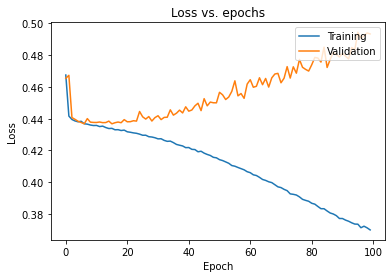

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

The current form of this model is suffering from overfitting, and so one should introduce some regularization parameters if it is intended to pursue better results. 